In [1]:
# University of Toronto
# Faculty of Information
# INF2178
# Chi-shiun Yang
# 1009916897
# Jan 27, 2024
# Assignment 1

# import liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# load data
df = pd.read_excel('INF2178_A1_data.xlsx')
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [2]:
# add two columns to the dataframe
# the column "OCCUPIED_PER_ACTUAL" is the number of occupacy per capacity
# and "USER_PER_OCCUPIED" is the number of user per occupacy
df["OCCUPIED_PER_ACTUAL"] = np.where(df["CAPACITY_TYPE"] == "Room Based Capacity", df["OCCUPIED_ROOMS"] / df["CAPACITY_ACTUAL_ROOM"], df["OCCUPIED_BEDS"] / df["CAPACITY_ACTUAL_BED"])
df["USER_PER_OCCUPIED"] = np.where(df["CAPACITY_TYPE"] == "Room Based Capacity", df["SERVICE_USER_COUNT"] / df["OCCUPIED_ROOMS"], df["SERVICE_USER_COUNT"] / df["OCCUPIED_BEDS"])
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPIED_PER_ACTUAL,USER_PER_OCCUPIED
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,0.896552,2.846154
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,1.000000,1.000000
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,0.821429,1.043478
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,1.000000,1.470588
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,0.928571,1.000000


In [3]:
# the get_summary takes a dataset and returns its summary
def get_summary(dataset):
    min = np.round(dataset.min(), 2)
    q1 = np.round(dataset.quantile(0.25), 2)
    median = np.round(np.median(dataset), 2)
    q3 = np.round(dataset.quantile(0.75), 2)
    max =  np.round(dataset.max(), 2)
    iqr = q3 - q1
    mean = np.round(np.mean(dataset), 2)
    std = np.round(np.std(dataset), 2)
    return [min, q1, median, q3, max, iqr, mean, std]


In [4]:
# takes the labels and dataset then prints the summary dataframe
def get_summary_df(labels, datasets):
    # create the list of index in the df
    index = ["Min", "Q1 (25th percentile)", "Median", "Q3 (75th percentile)", "Max", "IQR (Interquartile range)", "Mean", "Standard deviation"]
    # initialize the list of summary
    summary = []
    # for each dataset
    for dataset in datasets:
        # get the summary list and append it to the list "summary"
        summary.append(get_summary(dataset))
    # transpose the summary list
    summary = np.array(summary).T
    # create the dataframe of the summary
    df_summary = pd.DataFrame(summary, columns =labels, index = index)
    # display the dataframe
    display(df_summary)

In [5]:
# draw_bar_plot takes the title, labels, and their counts then print the bar plots
def draw_bar_plot(title, labels, counts):
    fig, ax = plt.subplots()
    ax.bar(labels, counts, width = 0.25)
    ax.set_ylabel("Count")
    ax.set_title(title)
    plt.show()

In [6]:
# draw_bar_plot takes the title, data, and number of bins,then print the histogram
def draw_hist(title, data, bins):
    fig, ax = plt.subplots()
    ax.hist(data, bins = bins)
    ax.set_title(title)
    plt.show()

In [7]:
# draw_box_plot takes the title, label, and the datasets then print the plots
def draw_box_plot(title, labels, datasets):
    # Visualize petal length distribution for all species
    fig, ax = plt.subplots(figsize=(12, 7))

    # Remove top and right border
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Remove y-axis tick marks
    ax.yaxis.set_ticks_position("none")

    # Add major gridlines in the y-axis
    ax.grid(color = "grey", axis = "y", linestyle = "-", linewidth = 0.25, alpha = 0.5)

    # Set plot title
    ax.set_title(title)

    # draw the plot
    ax.boxplot(datasets, labels = labels)
    plt.show()

In [8]:
# one_sam_t_test takes the data, the population mean, and the threshold
# then print the t-statistic, p-value, and the result
def one_sam_t_test(data, pop_mean, alpha):
    # Using the Stats library, compute t-statistic and p-value
    t_stat, p_val = stats.ttest_1samp(a = data, popmean = pop_mean)
    print("t-statistic = " + str(np.round(t_stat, 2)))
    print("p-value = " + str(np.round(p_val, 2)))
    # show the confidence interval
    con_int = "At a " + str(int((1 - alpha) * 100)) + "% confidence level, "
    # and print the results by looking at the p-value and the threshold
    if p_val < alpha:
        print(con_int + "we reject the null hypothesis.")
    else:
        print(con_int + "we do not reject the null hypothesis.")

In [9]:
# two_sam_t_test takes the two datasets, whether they have equal variance, and the threshold (alpha)
# then print the t-statistic, p-value, and the result
def two_sam_t_test(data1, data2, equal_var, alpha):
    # Run the two sample t-test and get t-statistic and p-value
    t_stat, p_val = stats.ttest_ind(data1, data2, equal_var = equal_var)
    print("t-statistic = " + str(np.round(t_stat, 2)))
    print("p-value = " + str(np.round(p_val, 2)))
    # show the confidence interval
    con_int = "At a " + str(int((1 - alpha) * 100)) + "% confidence level, "
    # and print the results by looking at the p-value and the threshold
    if p_val < alpha:
        print(con_int + "we reject the null hypothesis.")
    else:
        print(con_int + "we do not reject the null hypothesis.")

In [10]:
# given the column_name having several categories, value_column_name for the values, 
# and the dataframe
def get_summary_bar_box_ttest(column_name, value_column_name, df):
    # get the list of uniqlue values in the column_name column
    unique_vals = df[column_name].unique().tolist()
    # initialize the list of data need to be calculate
    datasets = []
    # and the counts for each category
    counts = []
    # get the whole column of data as the population
    all_data = df[value_column_name]
    # # print the summary of the population
    # print("Summary of " + value_column_name)
    # get_summary(all_data)
    # also get the population mean
    pop_mean = np.round(np.mean(all_data), 2)

    # for each category
    for val in unique_vals:
        # get the values of the value_column_name column in the category
        data = df[df[column_name] == val][value_column_name]
        # append the data to the dataset list
        datasets.append(data)
        # append the count to the count list
        counts.append(len(data))
        # # print the summary of data in this category
        # print("Summary of " + value_column_name + " where " + column_name + " column having the value " + val)
        # get_summary(data)
        # run the 1 sample t-test with the population mean
        print("T-test with population mean (" + val + ") on " + value_column_name)
        one_sam_t_test(data, pop_mean, 0.05)
        # draw the histogram of the data in this category
        draw_hist(value_column_name + " where " + column_name + " is " + val, data, 30)

    # get the summary data frame from the dataset
    get_summary_df(["Population"] + unique_vals, [all_data] + datasets)
    # draw the bar plot of the count in each categories
    draw_bar_plot("Values in column " + column_name, unique_vals, counts)
    # draw the box plot of the population ("ALL") and each category
    draw_box_plot("Values in column " + value_column_name, ["All"] + unique_vals, [all_data] + datasets)

    # if there are two category in the column_name column
    if len(unique_vals) == 2:
        print("Two sample t-test on two categories")
        # we compute the 2 sample t-test on them
        [data1, data2] = datasets
        two_sam_t_test(data1, data2, np.std(data1) == np.std(data2), 0.05)
    

T-test with population mean (Room Based Capacity) on OCCUPIED_PER_ACTUAL
t-statistic = 3.41
p-value = 0.0
At a 95% confidence level, we reject the null hypothesis.


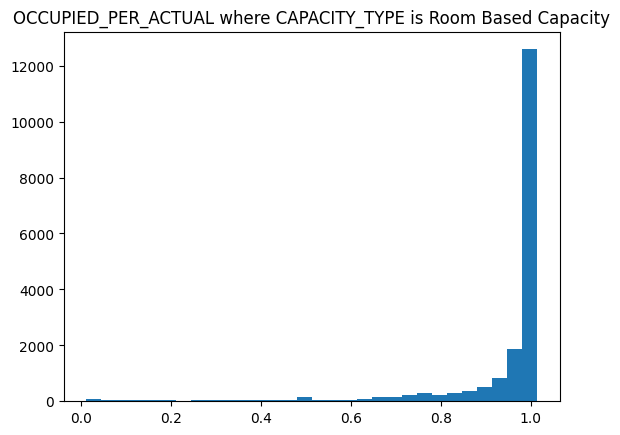

T-test with population mean (Bed Based Capacity) on OCCUPIED_PER_ACTUAL
t-statistic = -3.11
p-value = 0.0
At a 95% confidence level, we reject the null hypothesis.


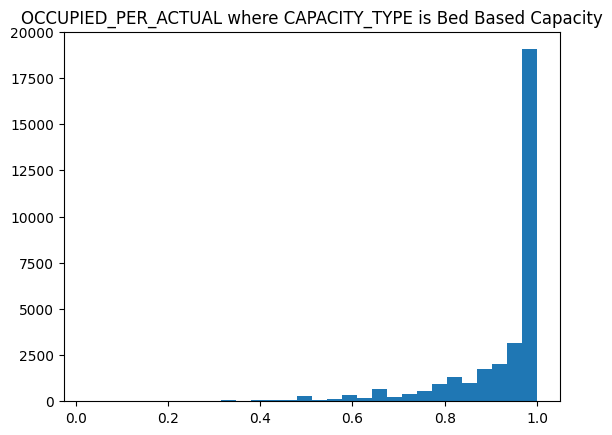

,Population,Room Based Capacity,Bed Based Capacity
Min,0.01,0.01,0.02
Q1 (25th percentile),0.92,0.96,0.90
Median,1.00,1.00,1.00
Q3 (75th percentile),1.00,1.00,1.00
Max,1.01,1.01,1.00
IQR (Interquartile range),0.08,0.04,0.10
Mean,0.93,0.93,0.93
Standard deviation,0.14,0.16,0.12


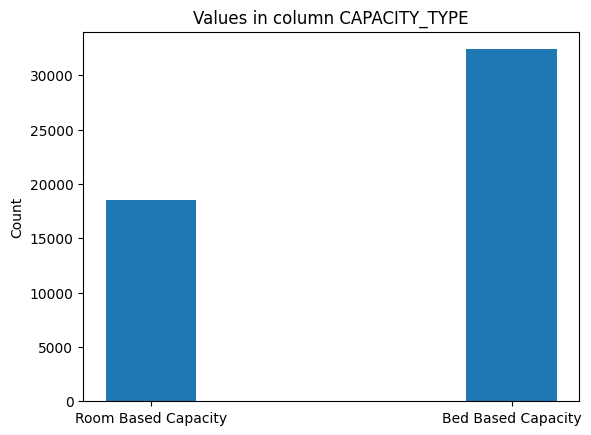

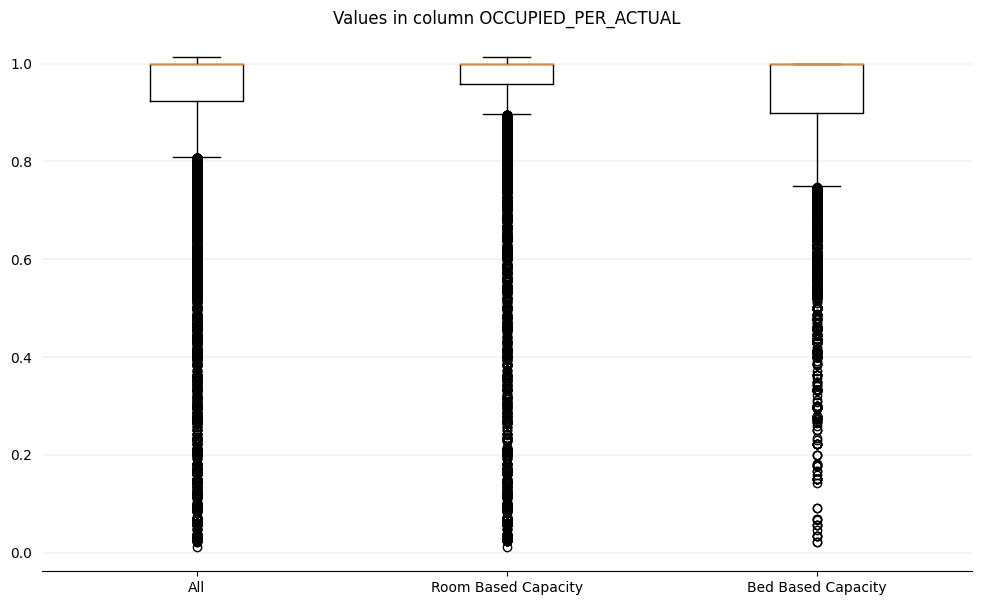

Two sample t-test on two categories
t-statistic = 4.5
p-value = 0.0
At a 95% confidence level, we reject the null hypothesis.


In [11]:
# compute the OCCUPIED_PER_ACTUAL column group by the CAPACITY_TYPE
get_summary_bar_box_ttest("CAPACITY_TYPE", "OCCUPIED_PER_ACTUAL", df)

In [12]:
# get the numbers of different capacity type and program model
pd.crosstab(df["PROGRAM_MODEL"], df["CAPACITY_TYPE"])

CAPACITY_TYPE,Bed Based Capacity,Room Based Capacity
PROGRAM_MODEL,,
Emergency,23726,17815
Transitional,8671,730


T-test with population mean (Emergency) on USER_PER_OCCUPIED
t-statistic = -4.79
p-value = 0.0
At a 95% confidence level, we reject the null hypothesis.


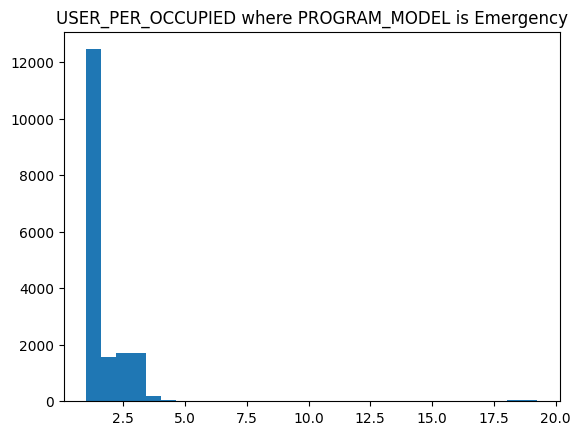

T-test with population mean (Transitional) on USER_PER_OCCUPIED
t-statistic = 146.07
p-value = 0.0
At a 95% confidence level, we reject the null hypothesis.


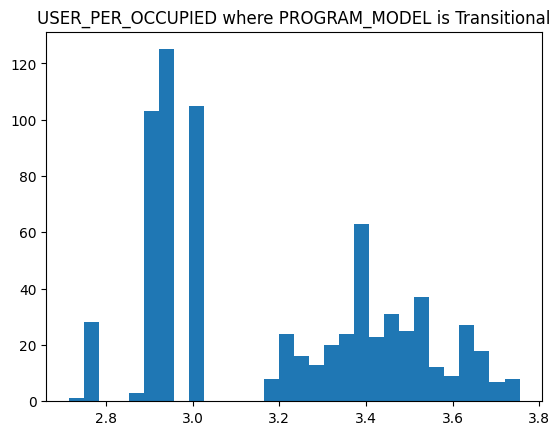

,Population,Emergency,Transitional
Min,1.00,1.00,2.71
Q1 (25th percentile),1.00,1.00,2.95
Median,1.07,1.05,3.08
Q3 (75th percentile),2.00,2.00,3.42
Max,19.25,19.25,3.75
IQR (Interquartile range),1.00,1.00,0.47
Mean,1.70,1.64,3.19
Standard deviation,1.65,1.65,0.28


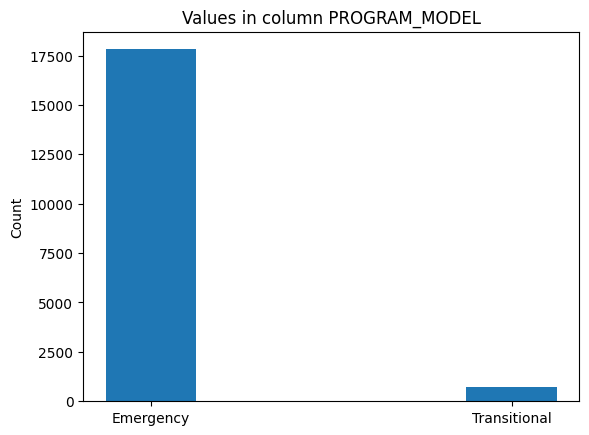

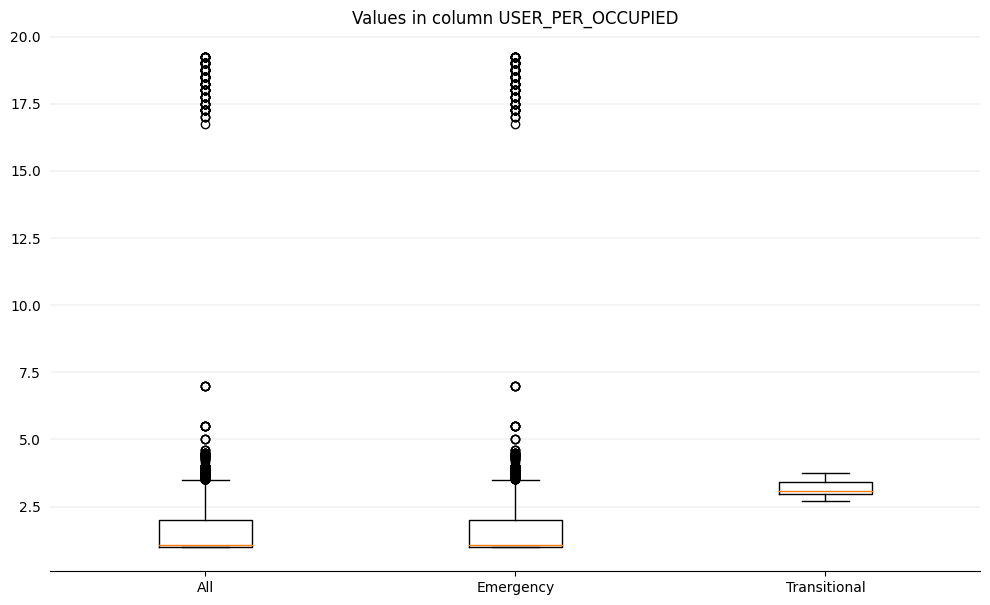

Two sample t-test on two categories
t-statistic = -96.64
p-value = 0.0
At a 95% confidence level, we reject the null hypothesis.


In [13]:
# compute the USER_PER_OCCUPIED column group by the PROGRAM_MODEL of the Room Based Capacity ones
get_summary_bar_box_ttest("PROGRAM_MODEL", "USER_PER_OCCUPIED", df[df["CAPACITY_TYPE"] == "Room Based Capacity"])

In [14]:
# view the unique values in the PROGRAM_MODEL column
df["PROGRAM_MODEL"].unique()

array(['Emergency', 'Transitional', nan], dtype=object)

In [15]:
# get the column which the PROGRAM_MODEL is not nan
df_notna_model = df[df["PROGRAM_MODEL"].notna()]

T-test with population mean (Emergency) on OCCUPIED_PER_ACTUAL
t-statistic = 16.79
p-value = 0.0
At a 95% confidence level, we reject the null hypothesis.


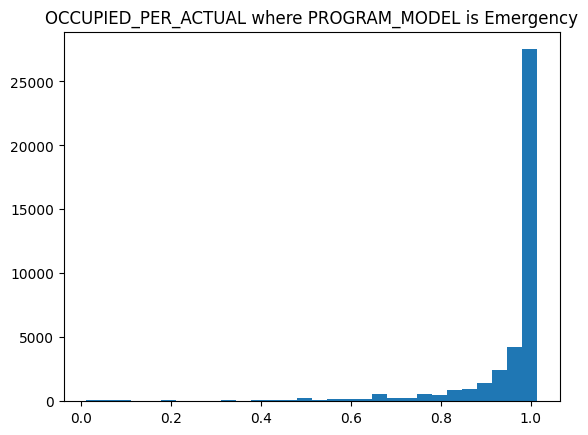

T-test with population mean (Transitional) on OCCUPIED_PER_ACTUAL
t-statistic = -37.45
p-value = 0.0
At a 95% confidence level, we reject the null hypothesis.


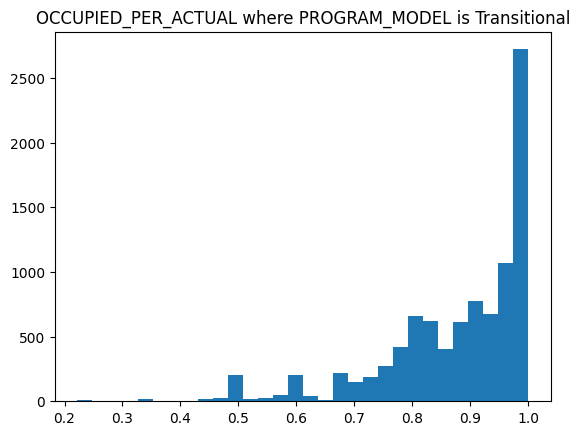

,Population,Emergency,Transitional
Min,0.01,0.01,0.22
Q1 (25th percentile),0.92,0.95,0.82
Median,1.00,1.00,0.92
Q3 (75th percentile),1.00,1.00,1.00
Max,1.01,1.01,1.00
IQR (Interquartile range),0.08,0.05,0.18
Mean,0.93,0.94,0.88
Standard deviation,0.14,0.14,0.13


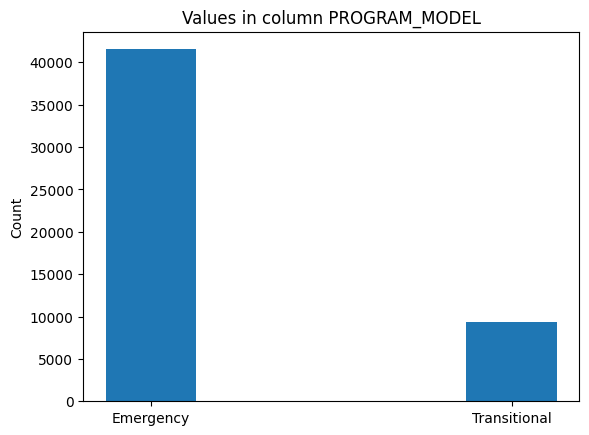

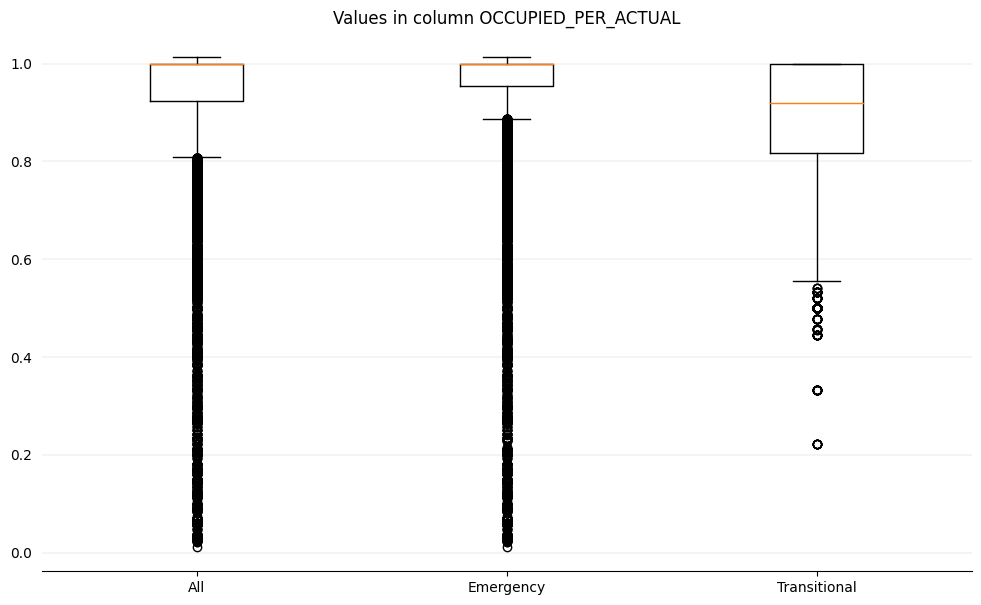

Two sample t-test on two categories
t-statistic = 40.98
p-value = 0.0
At a 95% confidence level, we reject the null hypothesis.


In [16]:
# compute the OCCUPIED_PER_ACTUAL column group by the PROGRAM_MODEL
get_summary_bar_box_ttest("PROGRAM_MODEL", "OCCUPIED_PER_ACTUAL", df_notna_model)

T-test with population mean (Emergency) on OCCUPIED_PER_ACTUAL
t-statistic = 7.03
p-value = 0.0
At a 95% confidence level, we reject the null hypothesis.


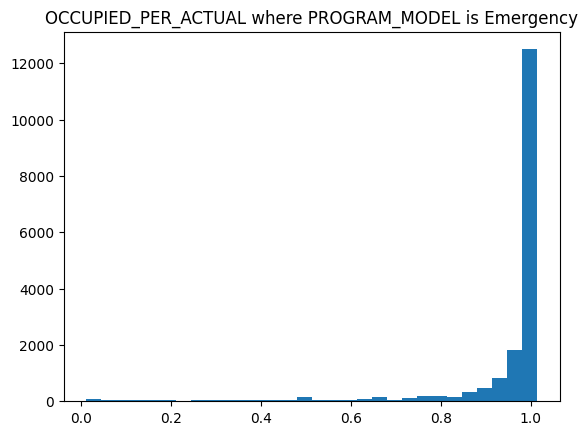

T-test with population mean (Transitional) on OCCUPIED_PER_ACTUAL
t-statistic = -31.17
p-value = 0.0
At a 95% confidence level, we reject the null hypothesis.


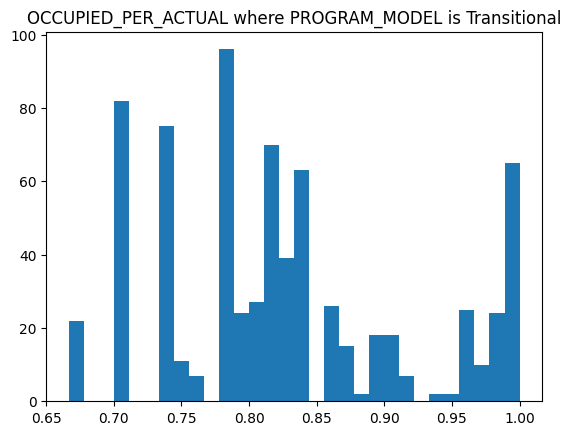

,Population,Emergency,Transitional
Min,0.01,0.01,0.67
Q1 (25th percentile),0.96,0.97,0.75
Median,1.00,1.00,0.81
Q3 (75th percentile),1.00,1.00,0.87
Max,1.01,1.01,1.00
IQR (Interquartile range),0.04,0.03,0.12
Mean,0.93,0.94,0.82
Standard deviation,0.16,0.16,0.09


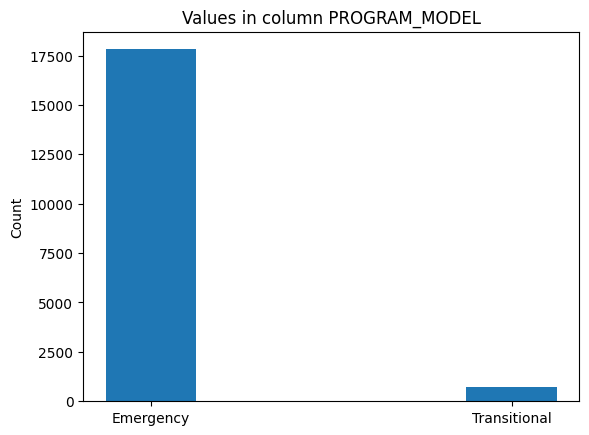

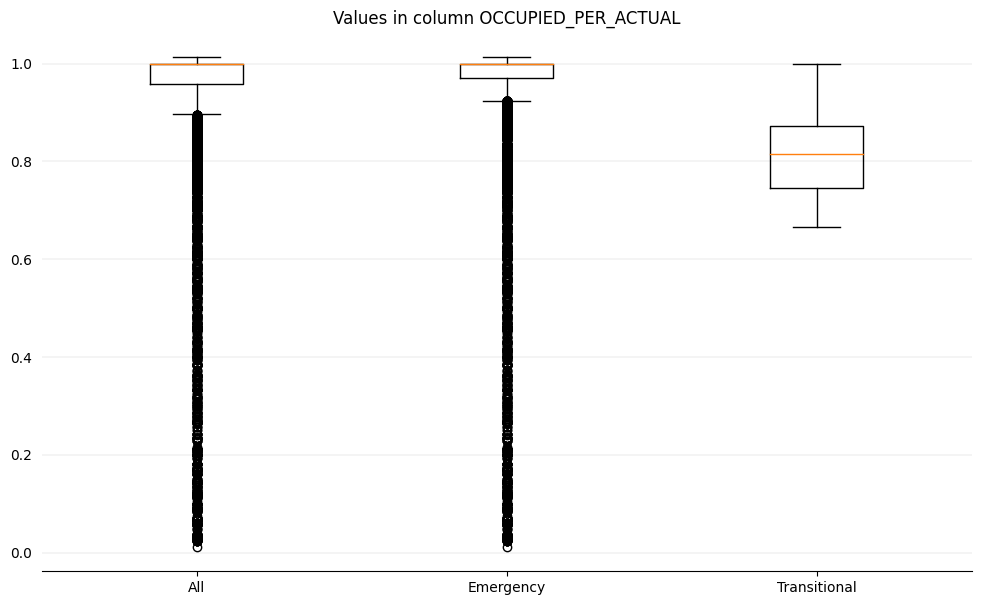

Two sample t-test on two categories
t-statistic = 31.71
p-value = 0.0
At a 95% confidence level, we reject the null hypothesis.


In [17]:
# compute the OCCUPIED_PER_ACTUAL column group by the PROGRAM_MODEL for Room Based ones
get_summary_bar_box_ttest("PROGRAM_MODEL", "OCCUPIED_PER_ACTUAL", df_notna_model[df_notna_model["CAPACITY_TYPE"] == "Room Based Capacity"])

T-test with population mean (Emergency) on OCCUPIED_PER_ACTUAL
t-statistic = 17.94
p-value = 0.0
At a 95% confidence level, we reject the null hypothesis.


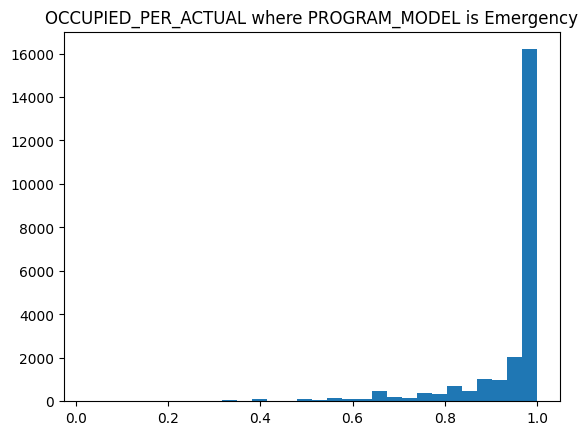

T-test with population mean (Transitional) on OCCUPIED_PER_ACTUAL
t-statistic = -32.12
p-value = 0.0
At a 95% confidence level, we reject the null hypothesis.


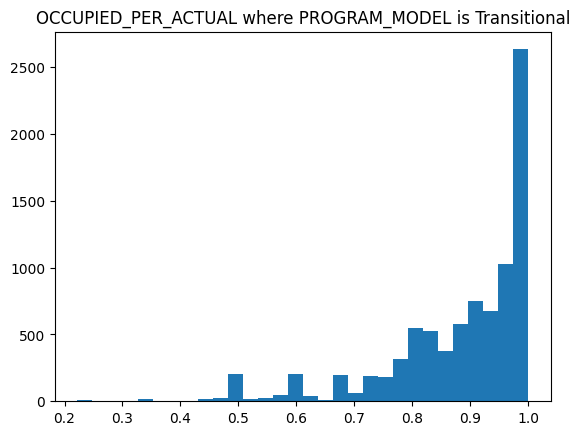

,Population,Emergency,Transitional
Min,0.02,0.02,0.22
Q1 (25th percentile),0.90,0.94,0.82
Median,1.00,1.00,0.92
Q3 (75th percentile),1.00,1.00,1.00
Max,1.00,1.00,1.00
IQR (Interquartile range),0.10,0.06,0.18
Mean,0.93,0.94,0.89
Standard deviation,0.12,0.12,0.13


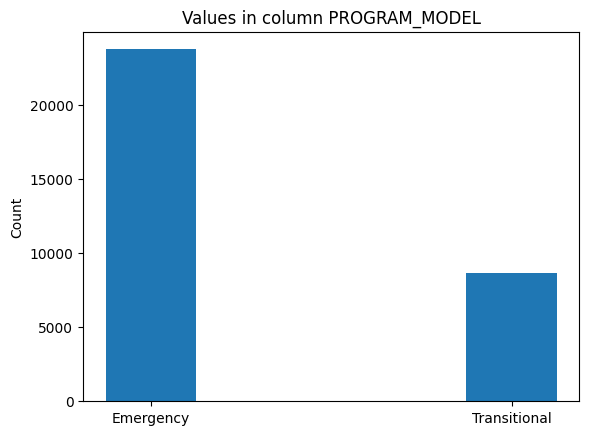

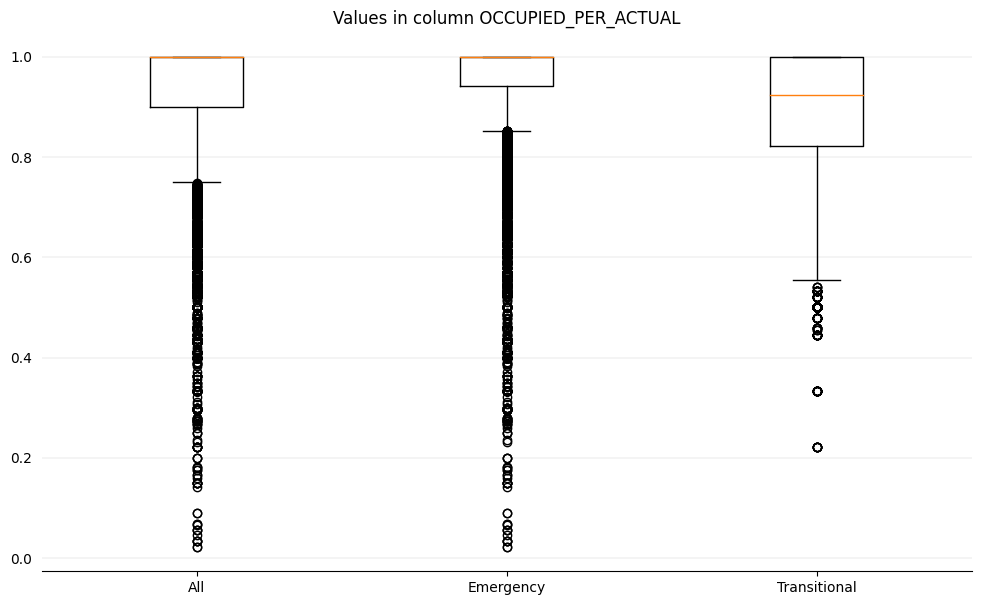

Two sample t-test on two categories
t-statistic = 36.78
p-value = 0.0
At a 95% confidence level, we reject the null hypothesis.


In [18]:
# compute the OCCUPIED_PER_ACTUAL column group by the PROGRAM_MODEL for Bed Based ones
get_summary_bar_box_ttest("PROGRAM_MODEL", "OCCUPIED_PER_ACTUAL", df_notna_model[df_notna_model["CAPACITY_TYPE"] == "Bed Based Capacity"])